In [1]:
!python3 --version

Python 3.10.12


In [2]:
import numpy as np
import matplotlib.pyplot as plt
record=np.dtype([('spin', str, 20), ('ao-basis', str, 20),('System', str, 20), ('charge', int), ('unpaired', int), ('oep-basis', str, 20), ('thr_int_fai', np.float32),  ('Eigval', np.float32), ('eig_H_error', np.float32), ('eig_percent_error', np.float32), ('Hatree_Error', np.float32), ('Density_Error', np.float32), ('t_tilde_error', np.float32)])
table = np.loadtxt('table_2', dtype=record)
colormap = plt.cm.gist_ncar


/home/quantura/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
thresholds, systems = [], []
for line in table:
    thresholds.append(line[6])
    systems.append(line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0])

thresholds = np.sort(np.unique(thresholds))[::-1]
systems = np.sort(np.unique(systems))[::-1]


In [4]:
Eigval_Hartree_errors, Eigval_errors, Hartree_errors, Density_errors, RHS_errors, Individual_errors  = {}, {}, {}, {}, {}, {}

In [5]:
for system in systems:
    Individual_errors[system] = {}
    Individual_errors[system]['Error'] = []
    Individual_errors[system]['threshold'] = []

In [6]:
for threshold in thresholds:
    Eigval_errors[threshold], Hartree_errors[threshold], Density_errors[threshold], Eigval_Hartree_errors[threshold], RHS_errors[threshold]  = [], [], [], [], []


In [7]:
for line in table:
    Eigval_Hartree_errors[line[6]].append(line[8])
    Eigval_errors[line[6]].append(line[9])
    Hartree_errors[line[6]].append(line[10])
    Density_errors[line[6]].append(line[11])
    RHS_errors[line[6]].append(line[12])


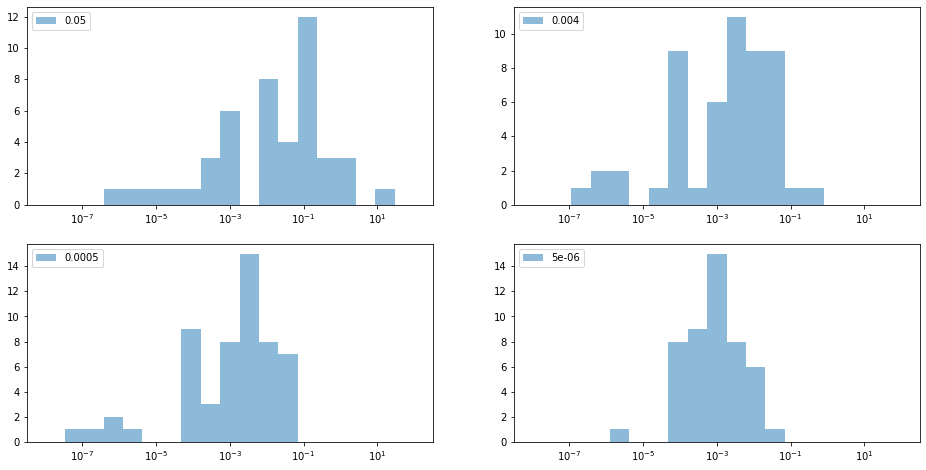

In [8]:
fig = plt.figure(figsize=(16,8))
i=1

for threshold in thresholds[::4]:
    ax = plt.subplot(2, 2, i)
    plt.hist(RHS_errors[np.float32(threshold)], bins=np.logspace(-8,2,20), alpha = 0.5, label=str(threshold))  # density=False would make counts
    ax.set_xscale('log')
    ax.legend(loc="upper left")
    i+=1
plt.show()


# Right Hand Side errors
 The RHS errors in the final step of the inversion for each spin channel
 for the 56 FCI systems available, aug-cc-pwCVTZ + aug-cc-pDVZ/mp2fit\
 Indicated on the top left in each panel is the thr_fai\
 The distribution of RHS moves left\
 On the right of the distribution a set (counts 2) of large errors remains\
 These are the same 2 systems in all cases.

56


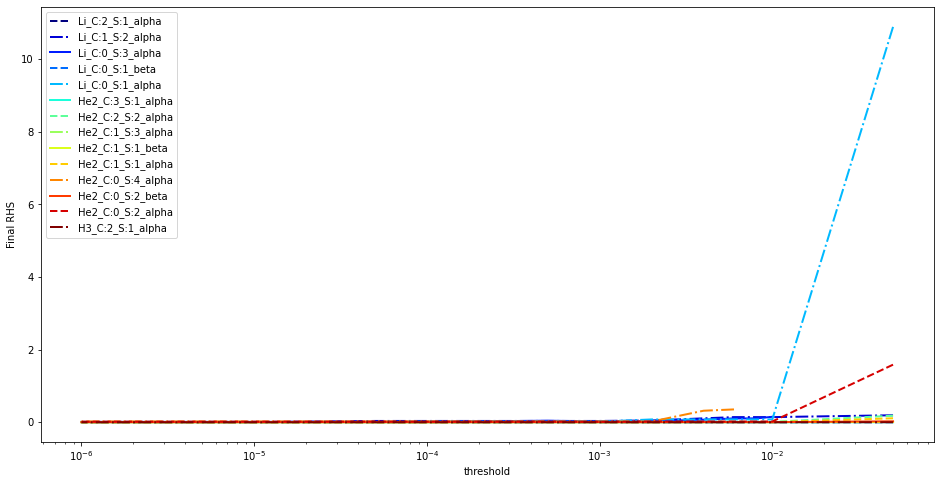

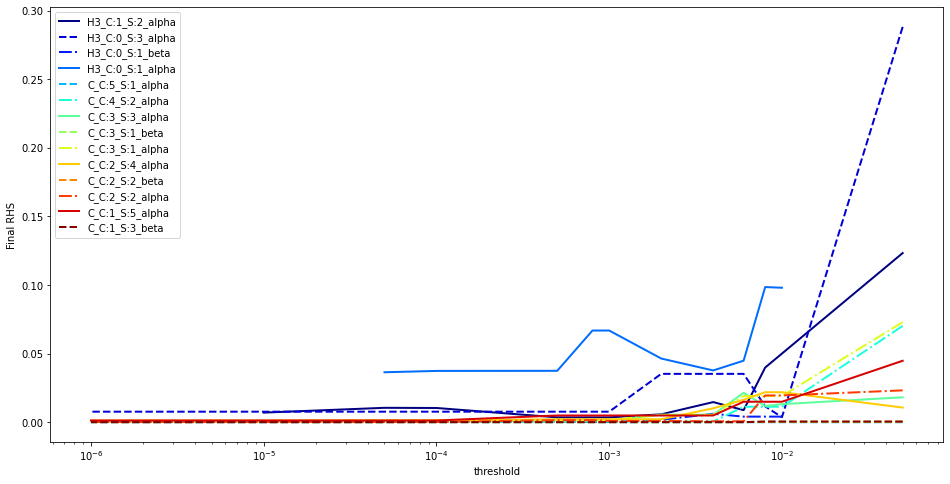

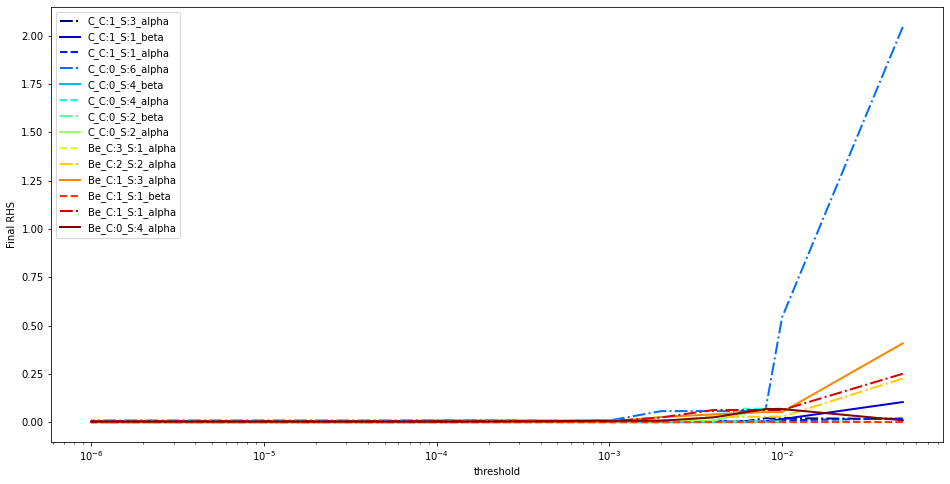

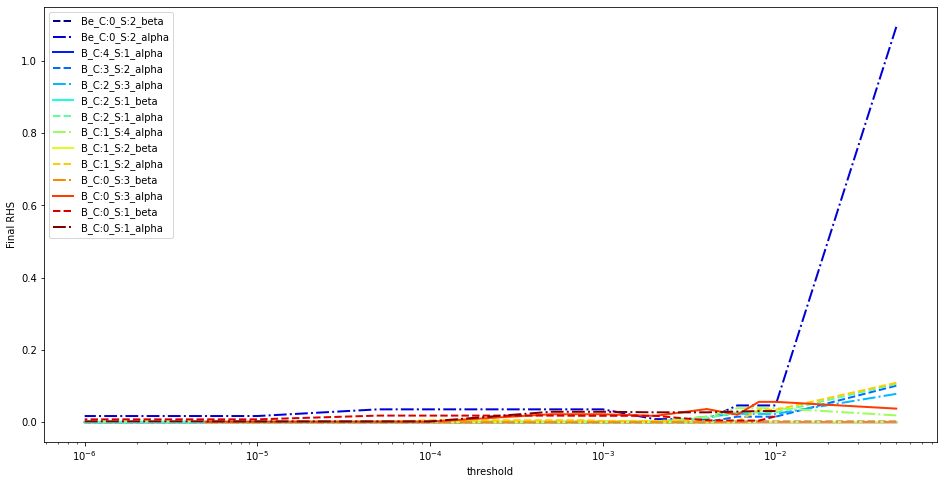

In [9]:
  for line in table:
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['Error'].append(line[12]) # 8 -> eig [H], 9 -> eig [%], 10 -> E_H [H], 11 \rho [e⁻], 12 t~
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['threshold'].append(line[6])

  ls = ['-', '--', '-.']
  j = 0

  print(len(systems))
  for i in range(0,4):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 14))))
    for system in systems[i*14:(i+1)*14]:
      j+=1
      cls=ls[j%3]
      ax.plot(Individual_errors[system]['threshold'], Individual_errors[system]['Error'], lw=2, label=system, linestyle=cls)
    plt.legend(loc="upper left")
    plt.xlabel('threshold')
    plt.ylabel('Final RHS')
    ax.set_xscale('log')

## Remaining Unprocessed RHS in the last Step
All 56 Systems in 4 different figures with 14 plots each for readability. He2 C=0, S=2, alpha produces an immutable and high values. The same is true for He2 C=0, S=4 

56


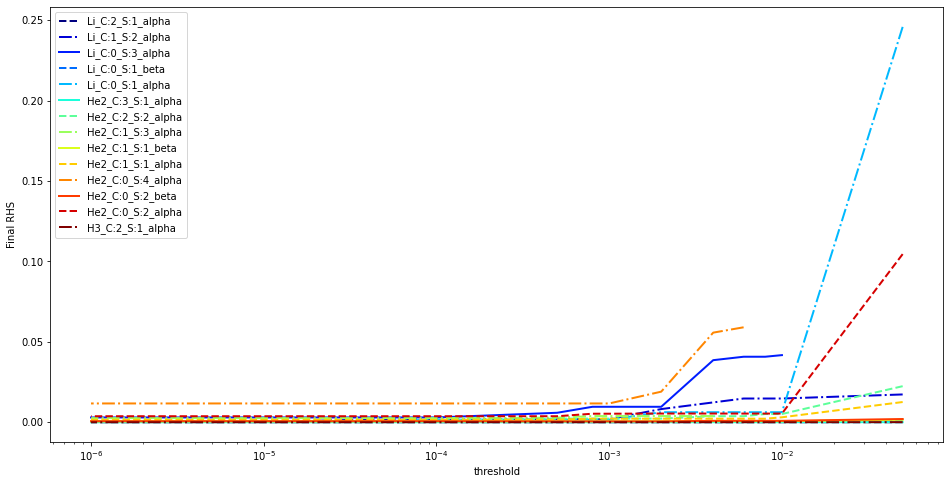

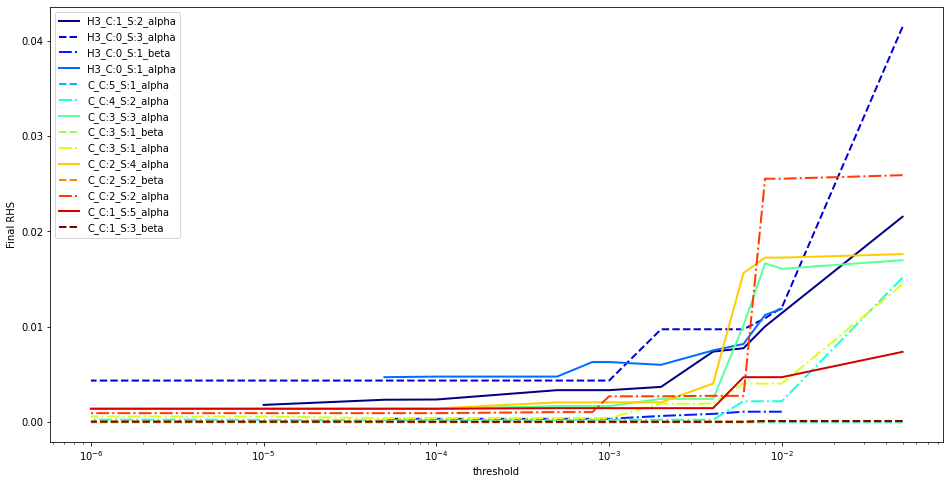

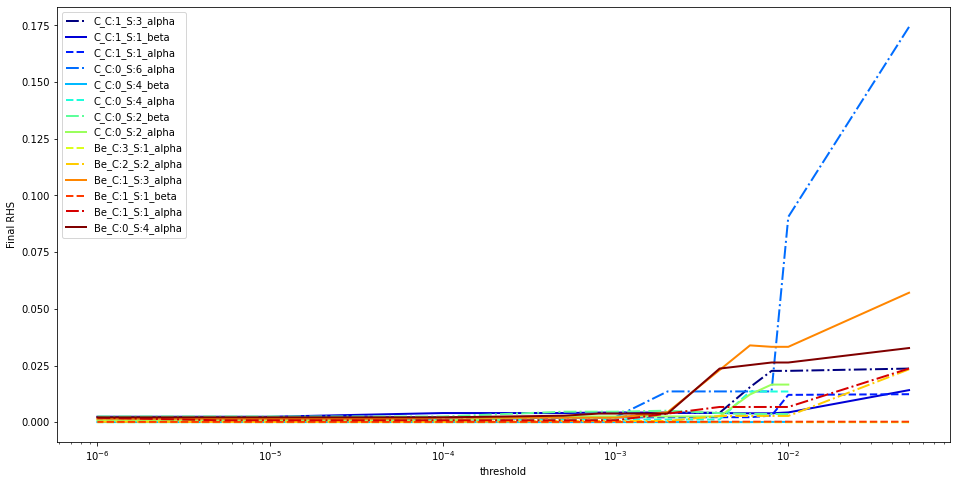

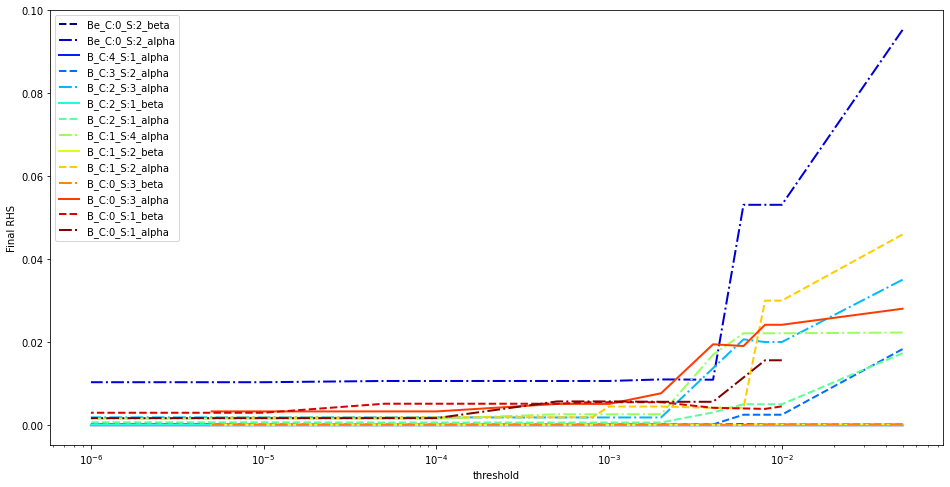

In [10]:
  for system in systems:
    Individual_errors[system] = {}
    Individual_errors[system]['Error'] = []
    Individual_errors[system]['threshold'] = []
  for line in table:
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['Error'].append(line[11]) # 8 -> eig [H], 9 -> eig [%], 10 -> E_H [H], 11 \rho [e⁻], 12 t~
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['threshold'].append(line[6])

  ls = ['-', '--', '-.']
  j = 0

  print(len(systems))
  for i in range(0,4):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 14))))
    for system in systems[i*14:(i+1)*14]:
      j+=1
      cls=ls[j%3]
      ax.plot(Individual_errors[system]['threshold'], Individual_errors[system]['Error'], lw=2, label=system, linestyle=cls)
    plt.legend(loc="upper left")
    plt.xlabel('threshold')
    plt.ylabel('Final RHS')
    ax.set_xscale('log')

## Density Integral Errors 
He2 0 - 4 and He2 1 - 3 are generating an impossible error here and do not change with threshold.

56


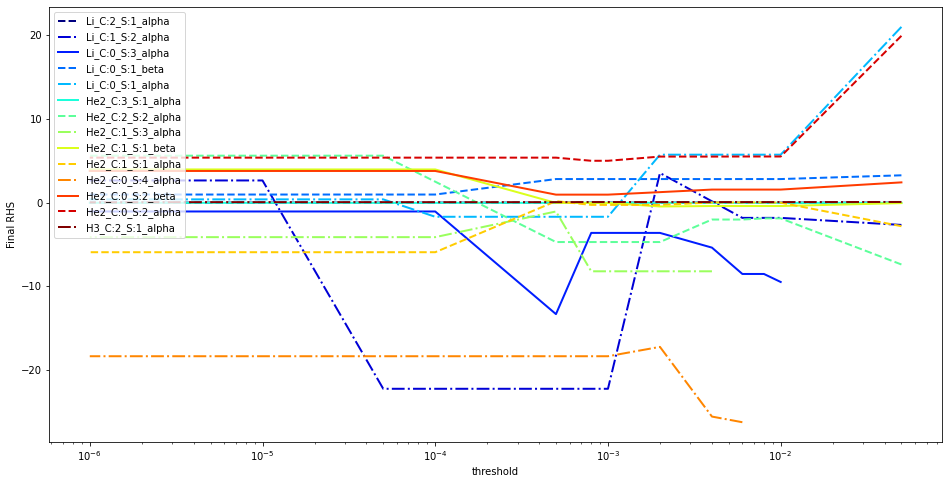

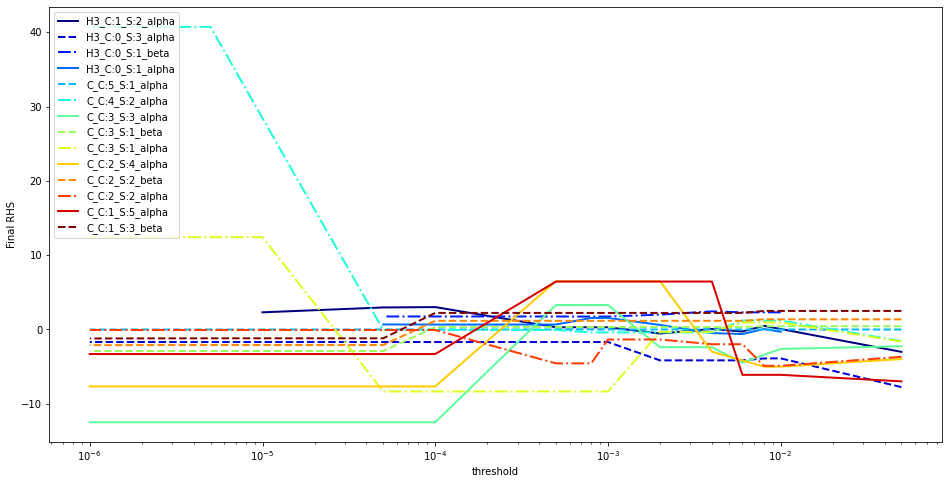

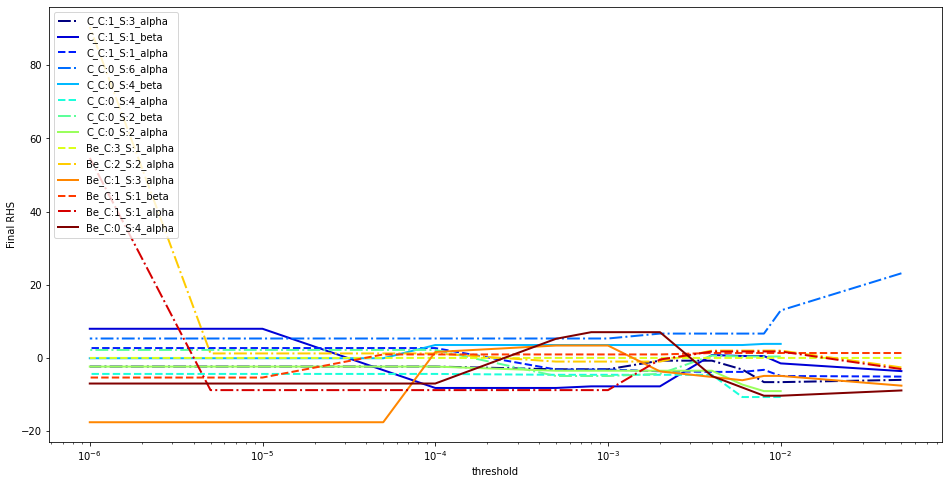

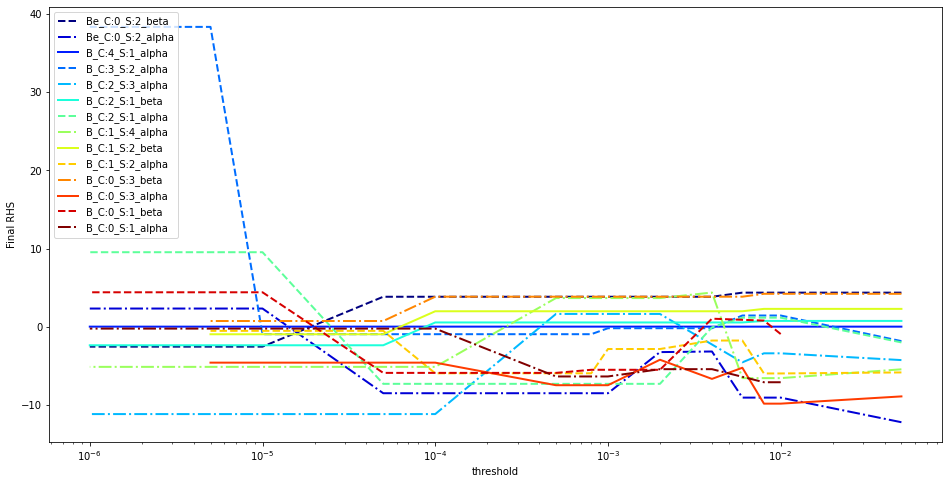

In [11]:
  for system in systems:
    Individual_errors[system] = {}
    Individual_errors[system]['Error'] = []
    Individual_errors[system]['threshold'] = []
  for line in table:
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['Error'].append(line[9]) # 8 -> eig [H], 9 -> eig [%], 10 -> E_H [H], 11 \rho [e⁻], 12 t~
      Individual_errors[line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0]]['threshold'].append(line[6])

  ls = ['-', '--', '-.']
  j = 0

  print(len(systems))
  for i in range(0,4):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 14))))
    for system in systems[i*14:(i+1)*14]:
      j+=1
      cls=ls[j%3]
      ax.plot(Individual_errors[system]['threshold'], Individual_errors[system]['Error'], lw=2, label=system, linestyle=cls)
    plt.legend(loc="upper left")
    plt.xlabel('threshold')
    plt.ylabel('Final RHS')
    ax.set_xscale('log')

## Percentage Eigenvalue Errors
The Systems that were noticeable before by large immutable values are now not necessarily noticable because of qunatity but still immutability. 